# 과제

### Problem 1

numpy를 활용해 어떤 행렬이 singular matrix인지 확인하는 함수를 작성하세요.

(* singular matrix : 역행렬이 존재하지 않은 행렬)

- 매개변수 : 2차원 벡터(np.array)
- 반환값 : 인자로 주어진 벡터가 singular하면 True, non-singular하면 False를 반환

In [1]:
import numpy as np

# 내부 코드는 오로지 한 줄이어야 합니다.
# Hint: 역행렬의 존재 조건을 고민해보세요.

def p1(x):
    return np.linalg.det(x) == 0

In [2]:
ex_1 = np.array([[1,4],[2,8]])
ex_2 = np.array([[2,3],[3,4]])

answer = (True, False)
your_work = (p1(ex_1), p1(ex_2))

print("your answer:", your_work)
print("correct" if answer is not None and answer == your_work else "wrong")

your answer: (True, False)
correct


### Problem 2

numpy를 활용해 어떤 벡터가 주어졌을 때 L2 norm을 구하는 함수를 작성하세요.

- 매개변수 : 1차원 벡터 (np.array)
- 반환값 : 인자로 주어진 벡터의 L2 Norm값 (number)

In [3]:
import numpy as np

# 내부 코드는 두 줄이어야 합니다.

def p2(x):
    return np.linalg.norm(x, ord=2)

def p2_1(x, n):
    return np.sum(x**n)**(1/n).real

In [4]:
ex_1 = np.array([[1,4,5],[2,8,3]])
ex_2 = np.array([[2,3],[3,4]])

answer = (10.560835223390939, 6.162277660168379)
your_work = (p2(ex_1), p2(ex_2))

print("your answer:", your_work)
print("correct" if np.isclose(answer, your_work).all() else "wrong")    # ERROR-FIX

your answer: (10.560835223390939, 6.162277660168379)
correct


<details>
<summary><strong>기존에 제공된 채점방식으로 wrong이 나오는 이슈</strong></summary>


시스템에 따라 python의 floating-point precision이 다르므로, 제공되는 결과(answer)와 본인의 결과가 정확히 일치하지 않을 수 있습니다. 이 경우에는 wrong이 나오지만, 실제로는 정답입니다. <br>
따라서, 이러한 precision 문제를 회피하기 위해 numpy에서는 `isclose`라는 함수를 제공합니다. <br>
`isclose` 함수는 두 개의 숫자를 비교하여, 두 숫자가 일정한 오차범위 내에 있으면 True를 반환합니다. <br>
예를 들어, `isclose(1.0, 1.0000000000000001)`은 True를 반환합니다. <br>
따라서, 채점 코드를 위와 같이 `print("correct" if np.isclose(answer, your_work).all() else "wrong")` 로 바꿔주세요! <br>


</details>


### Problem 3

(wk1 과제 2번 문항에서 풀었던 문항과 동일합니다.)

one-hot encoding이란 인덱스의 집합이 주어졌을 때, 해당 인덱스에만 1을 부여하고 나머지 인덱스에는 0을 부여하여 데이터를 표현하는 방식입니다.

예를 들어, 주어진 인덱스의 집합이 [3, 0, 2, 1] 이라면 해당 집합을 다음과 같은 2차원 행렬로 표현할 수 있습니다.

\begin{matrix}
0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{matrix}

크기 N의 정수 리스트가 주어집니다. 인덱스는 음수가 될 수 없기 때문에 음수 데이터를 삭제 한 이후, one-hot encoding이 되어있는 2차원 리스트를 구하세요.

주어지는 리스트는 0 이상의 정수가 적어도 하나 존재함이 보장됩니다.

단, 함수 내부 코드는 최대 **9 줄**이어야 하며 **numpy를 활용**해야 합니다.

In [5]:
import numpy as np

# 내부 코드는 오로지 최대 9 줄이어야 합니다.
# Hint: 0을 만드는 행렬을 중심으로 조건을 바꿔보세요.

def p3(arr):
    arr = np.array(arr)
    arr = arr[arr>=0]   # list-comprehension을 사용하지 않고, numpy만 이용해 더 빠릅니다.
    encoded = np.zeros((arr.shape[0], arr.max()+1))
    encoded[np.arange(arr.shape[0]), arr] = 1
    return encoded

In [6]:
example = [5,1,0,-3,1,0,-2,4]
answer = [
    [0, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0]]
your_work = p3(example)

print("your answer:", your_work)
print("correct" if np.equal(answer, your_work).all() else "wrong")

your answer: [[0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
correct


<details>
<summary><strong>기존에 제공된 채점방식에서 error가 발생하는 이슈</strong></summary>


만약 your_work가 numpy.ndarray라면 비교 연산은 element-wise로 이루어집니다. <br>

**ex)** <br>
```python
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])
print(x == y) # [True, True, True]

if x == y: # error
    print("correct")
else:
    print("wrong")

if (x == y).all(): # correct
    print("correct")
else:
    print("wrong")
```

따라서, 채점 코드를 위와 같이 `print("correct" if (answer == your_work).all() else "wrong")` 로 바꿔주세요! <br>
</details>


### Problem 4

1.
2011년부터 2020년까지의 평균 영화 러닝타임은 각각 103, 101, 99, 100, 100, 95, 95, 96, 93, 90입니다.

연도와 러닝타임을 각각 List로 만들고, 이 리스트들을 활용해 movie_df DataFrame을 만드세요.

In [7]:
import pandas as pd

# (1) 연도와 러닝타임 list 만들기
# 연도 리스트는 for문을 활용해 만드세요.(내부 코드는 오로지 한 줄이어야 합니다.)
p3_years = list(range(2011, 2021))
p3_durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# (2) 각 리스트의 같은 인덱스끼리 같은 열에 취급하는 DataFrame 만들기
# 코드는 오로지 한 줄이어야 합니다.
# Hint1: 지난 시간에 배운 generator를 활용해보세요.
# Hint2: 열 이름을 지정하기 위해 columns=["years", "durations"] 활용해보세요.

# ======= A1 =======
movie_df = pd.DataFrame(zip(p3_years, p3_durations), columns=["years", "durations"])

# ======= A2 =======
movie_df = pd.DataFrame({"years": p3_years, "durations": p3_durations})

movie_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


2.
movie_df를 matploblib을 활용해 years와 durations의 관계를 나타내는 Line plot을 그리세요.

제목은 "Average Movie Durations 2011-2020"으로 설정하세요.

<AxesSubplot:xlabel='years'>

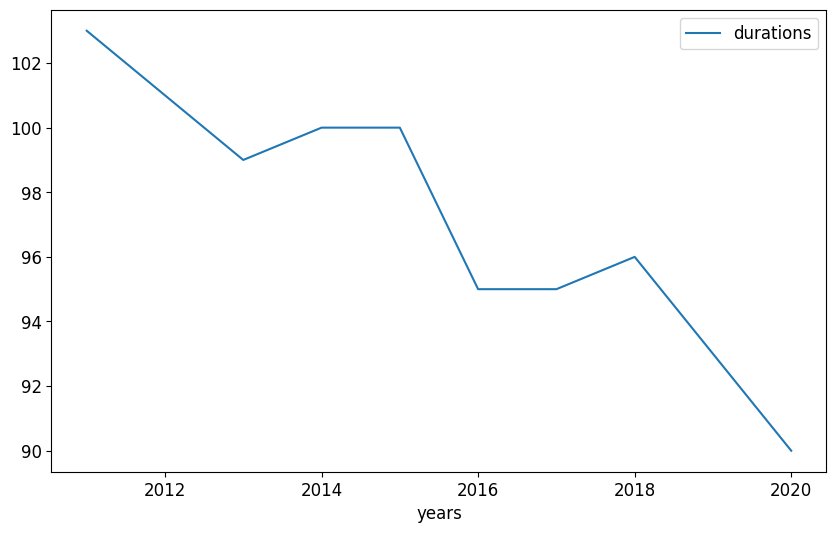

In [8]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["figure.dpi"] = 100
matplotlib.rcParams["font.size"] = 12

# matplotlib을 활용해 years와 durations의 관계를 나타내는 line plot 그리기
# 코드는 오로지 한 줄이어야 합니다.
# Hint: fig에 객체에 그래프를 저장해보세요.

# # ======= A1 =======
movie_df.plot(x="years", y="durations", kind="line")

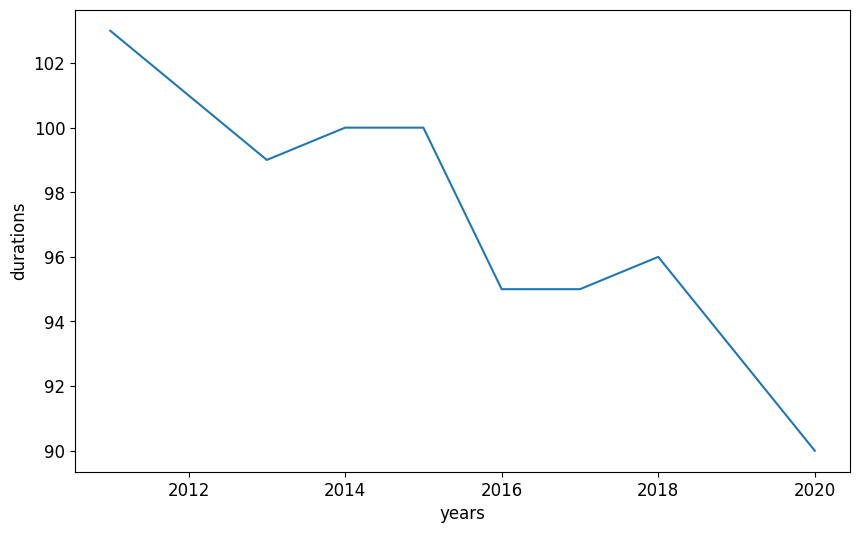

In [9]:
# # ======= A2 =======
plt.plot(movie_df["years"], movie_df["durations"])
plt.xlabel("years")
plt.ylabel("durations")
plt.show()

<AxesSubplot:xlabel='years', ylabel='durations'>

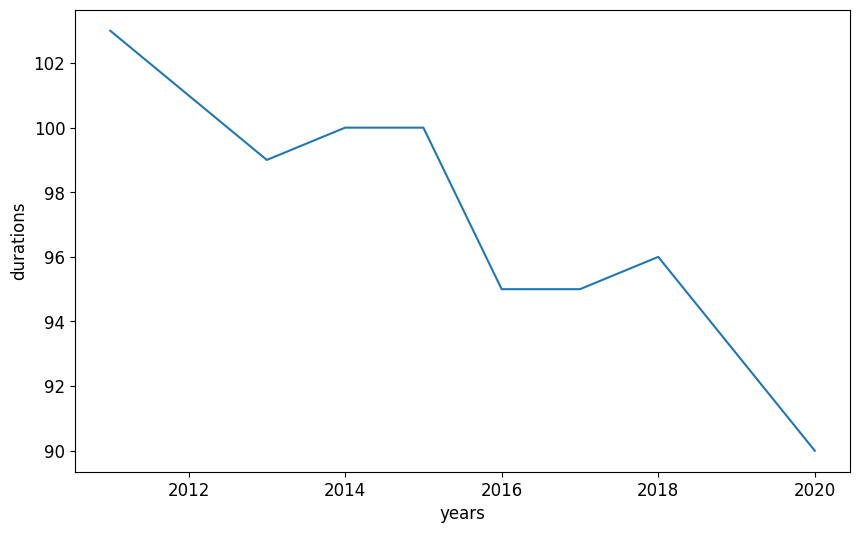

In [10]:
# ======= A3 =======
import seaborn as sns
sns.lineplot(x="years", y="durations", data=movie_df)

### Problem 5

1.
pandas 라이브러리를 활용해 <code>"datasets/netflix_data.csv"</code>을 불러 netflix_df에 DataFrame 형식으로 지정하고, 10번째 열까지 출력합니다.

In [11]:
import pandas as pd

# (1) pandas를 활용해 csv를 불러오기
# 코드는 오로지 한 줄이어야 합니다.
netflix_df = pd.read_csv("datasets/netflix_data.csv", index_col=0, encoding="utf-8", sep=",",
                         encoding_errors='ignore')

# (2) netflix_df의 10번째 열까지 출력하기
# 코드는 오로지 한 줄이어야 합니다.

netflix_df.head(10)   # 위에서 10개
netflix_df.tail(10)   # 아래서 10개
netflix_df.sample(10) # 랜덤으로 10개

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s1247,TV Show,Cathedral of the Sea,NaN,"Daniel Grao, Ginés García Millán, Óscar Hernán...",Spain,"August 31, 2018",2017,1,"In 14th-century Barcelona, a serf's determined...",International TV
s1412,Movie,Class Rank,Eric Stoltz,"Olivia Holt, Skyler Gisondo, Kristin Chenoweth...",United States,"September 18, 2018",2018,103,When her class rank threatens her college plan...,Comedies
s4801,TV Show,Paul Hollywood's Big Continental Road Trip,NaN,Paul Hollywood,United Kingdom,"September 29, 2017",2017,1,Gear up for a fast-paced journey as celebrity ...,British TV
s1100,Movie,Bridezilla,Andibachtiar Yusuf,"Jessica Mila, Rio Dewanto, Sheila Dara, Rafael...",Indonesia,"December 24, 2020",2019,94,After failing to deliver for a demanding bride...,Comedies
s774,Movie,Bazaar,Sagar Sarhadi,"Farooq Shaikh, Smita Patil, Naseeruddin Shah, ...",India,"December 31, 2019",1982,121,A young man challenges traditional customs by ...,Dramas
s5205,TV Show,RIDE ON TIME,NaN,"King & Prince, Hey! Say! JUMP, KAT-TUN, NEWS, ...",NaN,"August 13, 2020",2019,2,Take a deep dive into the beautiful world of J...,Docuseries
s7455,Movie,Waarrior Savitri,Param Gill,"Niharica Raizada, Rajat Barmecha, Lucy Pinder,...",India,"November 1, 2017",2016,120,"In a modern adaptation of a mythological tale,...",Action
s2199,Movie,Five Nights in Maine,Maris Curran,"David Oyelowo, Dianne Wiest, Rosie Perez, Teyo...",United States,"April 1, 2017",2015,83,"After his wife dies in a car accident, a grief...",Dramas
s418,Movie,All the Boys Love Mandy Lane,Jonathan Levine,"Anson Mount, Edwin Hodge, Michael Welch, Brook...",United States,"July 3, 2018",2006,91,During a weekend excursion to a secluded ranch...,Horror Movies


In [12]:
# netflix_df의 각 열의 non-null 데이터 수, 데이터 타입, 메모리 사용량 등을 알 수 있습니다.
# 잘 보니 총 7787개의 record가 있는데 director는 5400개 정도만 존재하네요.
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   duration      7787 non-null   int64 
 8   description   7787 non-null   object
 9   genre         7787 non-null   object
dtypes: int64(2), object(8)
memory usage: 669.2+ KB


2.
netflix_df에서 'type' 중에 'Movie'가 아닌 데이터가 있음을 확인할 수 있습니다. 위 DataFrame에서 'type'이 'Movie'면서 'genre'가 'Comedies', 'Dramas', 'Action', 'Horror Movies'인 데이터만 필터링해 분석하려고 합니다. 이를 새로운 DataFrame을 netflix_movies_genre_subset에 지정해보세요.

In [13]:
# netflix_df의 type, gener 열이 무슨 값들을 가지고 있는지 확인할 수 있습니다.
print(netflix_df["type"].unique())
print(netflix_df["genre"].unique())

['TV Show' 'Movie']
['International TV' 'Dramas' 'Horror Movies' 'Action' 'Crime TV'
 'Documentaries' 'Independent Movies' 'Comedies' 'Sports Movies'
 'Anime Series' 'Reality TV' 'TV Comedies' 'Docuseries' 'Uncategorized'
 'British TV' 'International Movies' 'Sci-Fi' 'Kids' 'Children' 'TV Shows'
 'Classic Movies' 'Thrillers' 'Stand-Up' 'Anime Features' 'Music'
 'TV Dramas' 'TV Horror' 'TV Action' 'Classic' 'Romantic TV' 'Cult Movies'
 'TV Sci' 'Romantic Movies' 'Spanish-Language' 'LGBTQ Movies']


In [14]:
# netflix_df에서 'type'이 'Movie'면서 'genre'가 'Comedies', 'Dramas', 'Action', 'Horror Movies'인 데이터만 필터링하기
# 코드는 오로지 한 줄이어야 합니다.
netflix_movies_genre_subset = ["Comedies", "Dramas", "Action", "Horror Movies"]
netflix_movies_genre_df = netflix_df[(netflix_df["type"] == "Movie") & (netflix_df["genre"].isin(netflix_movies_genre_subset))]
netflix_movies_genre_df.head(10)

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,118,"When a doctor goes missing, his psychiatrist w...",Horror Movies
s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,143,An architect and his wife move into a castle t...,Horror Movies
s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,103,A farmer pens a confession admitting to his wi...,Dramas


3.
netflix_movies_subset를 matploblib을 활용해 years와 durations의 관계를 나타내는 Scatter plot을 그리세요. 

- matplotlib이 아니라 seaborn을 활용해 scatter plot을 그리세요.
- dot size는 20으로, color는 **카테고리형 데이터** 인 'genre'의 종류 별로 지정하세요.
- 제목은 "Movie Durations by Release Year"로, xlabel은 "Release year"로, ylabel은 "Duration (min)"로 설정하세요.

<AxesSubplot:xlabel='release_year', ylabel='duration'>

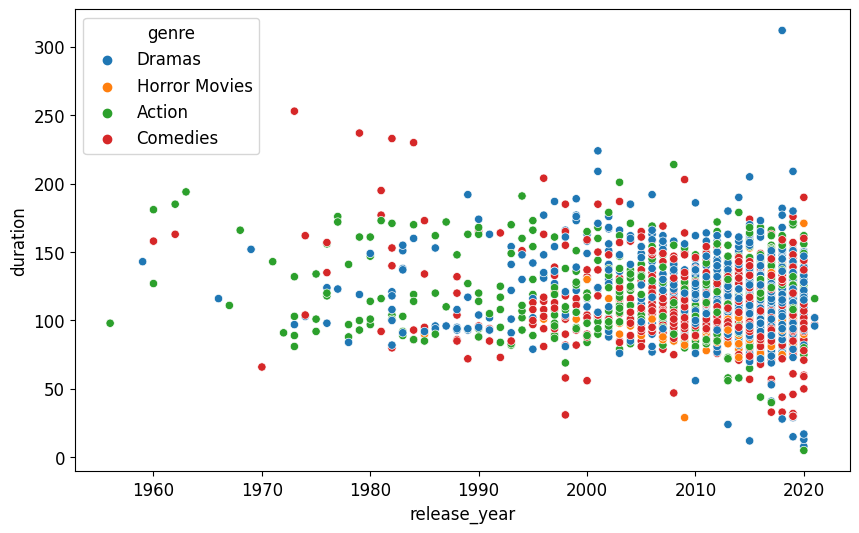

In [15]:
import seaborn as sns

# seaborn을 활용해 scatterplot을 그리기
# 코드는 오로지 한 줄이어야 합니다.
# Hint1: 색상은 color가 아니라, 카테고리형 데이터의 종류 별로 나눠주는 변수를 활용해 지정해보세요.
# Hint2: 제목이나 라벨은 .set()을 활용해보세요.

sns.scatterplot(x="release_year", y="duration", hue="genre", data=netflix_movies_genre_df)